## Predicting Grade Class using machine learning

This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting what grade class a student will get based on their academic activity performance .

We're going to take the following approch:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### 1. Problem Statement 

> Based on the academic information of the student, can we predict wether a student is in 1, 2, 3, or 4 grade class

### 2. Data
> The data is available on kaggle (https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset)

### 3. Evaluation
> If we can reach 95% accuracy at predicting the Grade Class of a student based on their performance in academic activities during the proof of concept, we'll pursue the project.

### 4. Features
> This is where you will get different information about each of the features in your data.

**Student Information**
* StudentID: A unique identifier assigned to each student (1001 to 3392).
**Demographic Details**
* Age: The age of the students ranges from 15 to 18 years.
* Gender: Gender of the students, where 0 represents Male and 1 represents Female.
* Ethnicity: The ethnicity of the students, coded as follows:
   * 0: Caucasian
   * 1: African American
   * 2: Asian
   * 3: Other
* ParentalEducation: The education level of the parents, coded as follows:
   * 0: None
   * 1: High School
   * 2: Some College
   * 3: Bachelor's
   * 4: Higher
    
**Study Habits**
* StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
* Absences: Number of absences during the school year, ranging from 0 to 30.
* Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

**Parental Involvement**
* ParentalSupport: The level of parental support, coded as follows:
   * 0: None
   * 1: Low
   * 2: Moderate
   * 3: High
   * 4: Very High
**Extracurricular Activities**
* Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
* Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
* Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
* Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

**Academic Performance**
* GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
* Target Variable: Grade Class
* GradeClass: Classification of students' grades based on GPA:
   * 0: 'A' (GPA >= 3.5)
   * 1: 'B' (3.0 <= GPA < 3.5)
   * 2: 'C' (2.5 <= GPA < 3.0)
   * 3: 'D' (2.0 <= GPA < 2.5)
   * 4: 'F' (GPA < 2.0)

### Preparing the tools
> Using Pandas, Numpy and Matplotlib for data analysis and manipulation

In [1]:
# install libaries
# !pip install catboost
# !pip install xgboost
# !pip install lightgbm


In [62]:
# Import all the tools we need

# Regular EDA(Explortory data analysis) and plotting librares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn

# Basic machine learning models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Advanced models: CatBoost, XGBoost, LightGBM
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve 
from sklearn.metrics import RocCurveDisplay, roc_auc_score

### Load Data

In [3]:
df = pd.read_csv("Student_performance_data _.csv")
df.shape

(2392, 15)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the data you're working with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it ?
4. Where are the outliers and why should we care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [6]:
# Let's find out how many of class there are
df["GradeClass"].value_counts()

4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: GradeClass, dtype: int64

<Axes: >

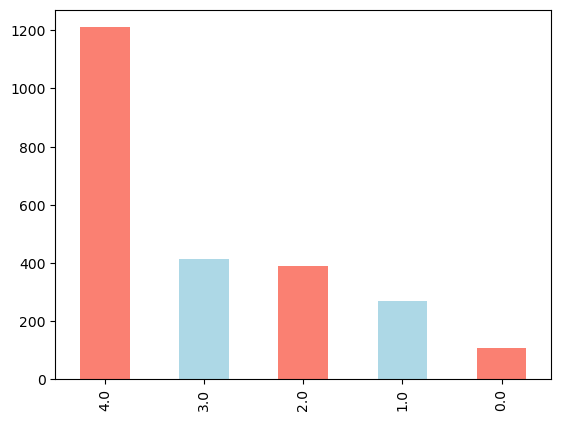

In [7]:
df["GradeClass"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [9]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [10]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


### Grade Class Frequency according Gender

In [11]:
df.Gender.value_counts()

1    1222
0    1170
Name: Gender, dtype: int64

In [12]:
# Compare Grade Class with Gender Column
pd.crosstab(df.GradeClass, df.Gender)

Gender,0,1
GradeClass,,
0.0,58,49
1.0,132,137
2.0,197,194
3.0,201,213
4.0,582,629


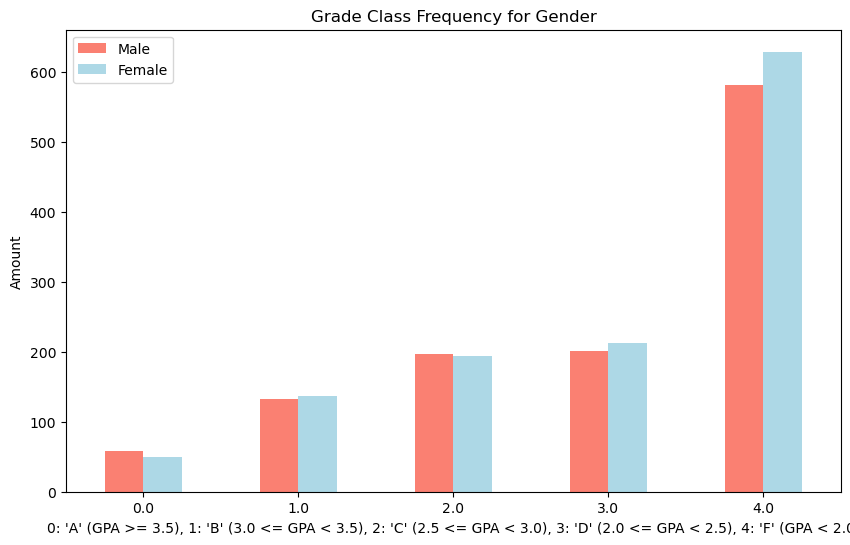

In [13]:
# Create a plot of the Crosstab
pd.crosstab(df.GradeClass, df.Gender).plot(kind="bar",
                                          figsize=(10,6),
                                          color=["salmon","lightblue"])
plt.title("Grade Class Frequency for Gender")
plt.xlabel("0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)")
plt.ylabel("Amount")
plt.legend(["Male", "Female"])
plt.xticks(rotation=0);

In [14]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### Age for Grade Class

int64
[17 18 15 16]


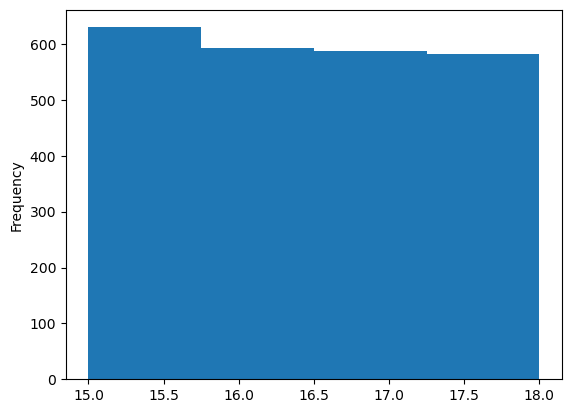

In [15]:
print(df['Age'].dtype)
print(df["Age"].unique())
df.Age.plot.hist(bins=4);

(array([630.,   0.,   0., 593.,   0.,   0., 587.,   0.,   0., 582.]),
 array([15. , 15.3, 15.6, 15.9, 16.2, 16.5, 16.8, 17.1, 17.4, 17.7, 18. ]),
 <BarContainer object of 10 artists>)

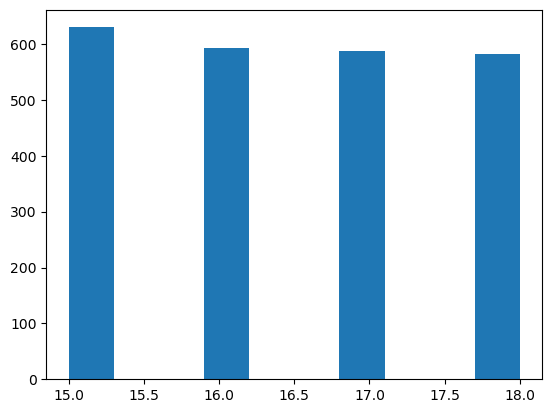

In [16]:
import matplotlib.pyplot as plt

plt.hist(df["Age"], bins =10)


### Grade class Frequency per Study Habits

**Study Habits**

* StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
* Absences: Number of absences during the school year, ranging from 0 to 30.
* Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.


In [17]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [18]:
pd.crosstab(df.Tutoring, df.GradeClass)

GradeClass,0.0,1.0,2.0,3.0,4.0
Tutoring,,,,,
0,55,160,273,301,882
1,52,109,118,113,329


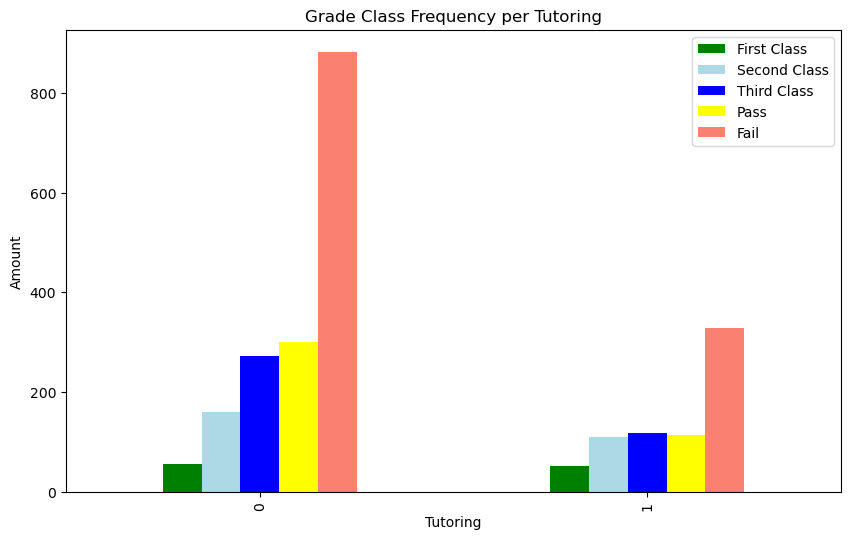

In [19]:
# Make crosstab more visual

pd.crosstab(df.Tutoring, df.GradeClass).plot(kind="bar",
                                            figsize=(10,6),
                                            color=["green","lightblue","blue","yellow","salmon"])

# Add some communication
plt.title("Grade Class Frequency per Tutoring")
plt.xlabel("Tutoring")
plt.ylabel("Amount")
plt.legend(["First Class", "Second Class", "Third Class", "Pass","Fail"])
# plt.xticks(rotation=0);

In [20]:
# Make a correlation matrix
df.corr()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


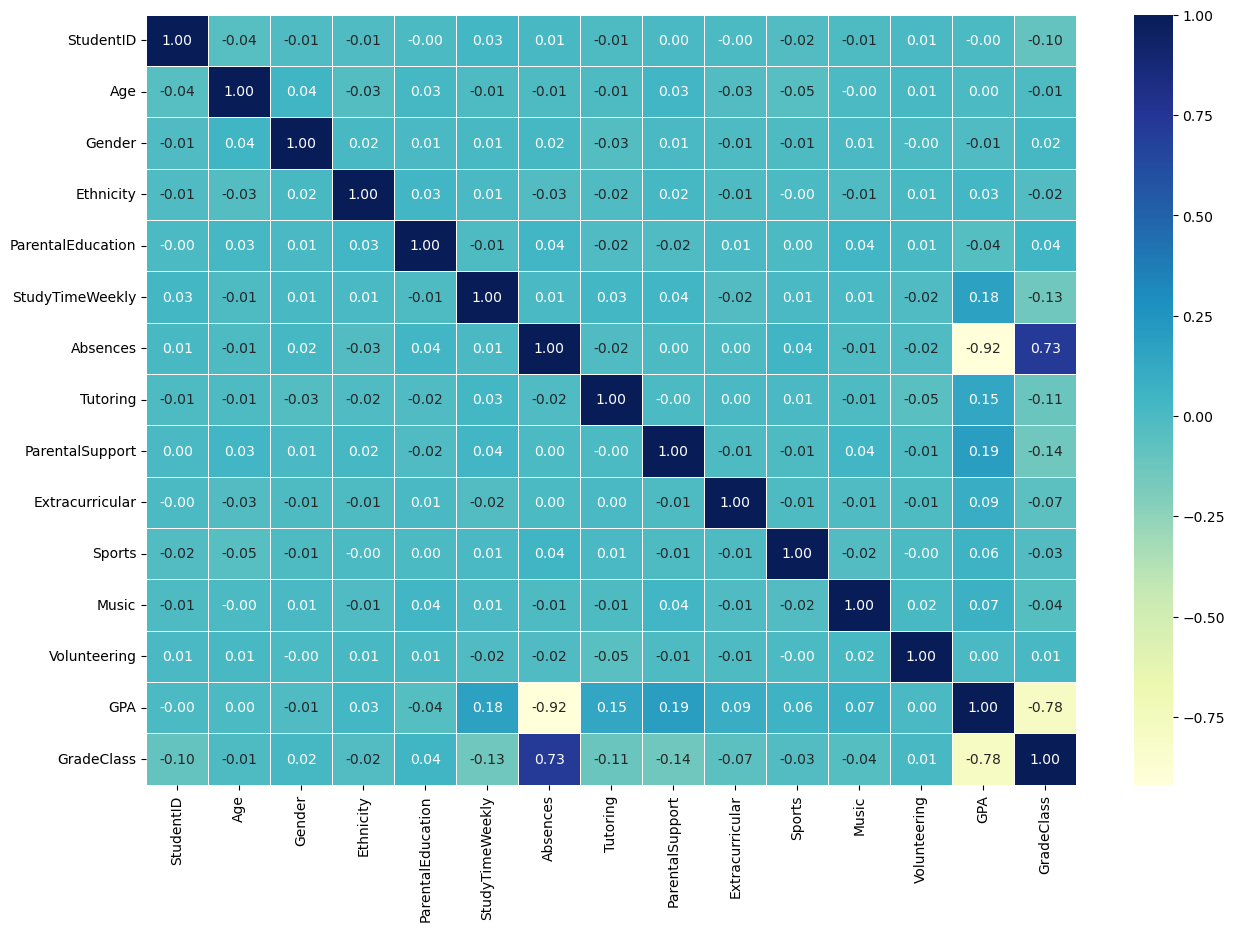

In [21]:
# Visualize correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot=True,
               linewidth=0.5,
               fmt=".2f",
               cmap="YlGnBu")

### 5. Modelling

In [22]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [23]:
# Split data into X and y

X = df.drop("GradeClass", axis=1)
y=df["GradeClass"]

In [24]:
X

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297


In [25]:
y

0       2.0
1       1.0
2       4.0
3       3.0
4       4.0
       ... 
2387    0.0
2388    4.0
2389    2.0
2390    1.0
2391    1.0
Name: GradeClass, Length: 2392, dtype: float64

In [26]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [27]:
X_train

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
642,1643,18,1,0,4,18.118879,24,1,0,1,1,0,0,1.396278
1752,2753,16,1,3,2,2.469271,19,0,1,0,0,0,1,0.754751
1401,2402,17,0,2,3,3.456401,25,0,0,0,0,0,0,0.136166
2032,3033,17,1,0,1,15.838131,25,1,2,0,0,0,0,1.172192
990,1991,16,0,0,0,1.045373,19,1,2,0,0,1,0,1.747356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,2639,15,0,1,0,13.092424,13,1,1,0,0,0,0,1.595627
1095,2096,16,0,0,2,2.159249,19,0,4,0,1,0,0,1.523945
1130,2131,16,1,0,2,3.572578,14,1,2,1,1,0,0,2.051919
1294,2295,18,0,3,2,4.402585,20,0,3,0,0,0,0,1.348997


In [28]:
y_train

642     4.0
1752    4.0
1401    4.0
2032    4.0
990     4.0
       ... 
1638    4.0
1095    4.0
1130    3.0
1294    4.0
860     4.0
Name: GradeClass, Length: 1913, dtype: float64

Now have splitted the data into training and test set, it's time to build a machine learning model.

We'll train it(find the patterns) on the training set
and we'll test it( use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier (have an idea about it)
4. CatBoost
5. XGBoost
6. SVM(Support Vector Machine)
7. Light GBM
8. K-Nearest Neighbors(KNN)

In [29]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "CatBoost": CatBoostClassifier(),
         "XGBoost": XGBClassifier(),
         "Support Virtual Machine(SVM)": SVC(),
         "LIght GBM": LGBMClassifier()}

# Create models to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [30]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

C:\Users\Esther Jokodola\anaconda3\envs\tensorflows\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.081788
0:	learn: 1.4043449	total: 311ms	remaining: 5m 10s
1:	learn: 1.2193059	total: 324ms	remaining: 2m 41s
2:	learn: 1.0863731	total: 335ms	remaining: 1m 51s
3:	learn: 0.9929023	total: 343ms	remaining: 1m 25s
4:	learn: 0.8960231	total: 354ms	remaining: 1m 10s
5:	learn: 0.8251381	total: 365ms	remaining: 1m
6:	learn: 0.7547490	total: 372ms	remaining: 52.8s
7:	learn: 0.7048777	total: 383ms	remaining: 47.5s
8:	learn: 0.6554092	total: 390ms	remaining: 42.9s
9:	learn: 0.6114165	total: 400ms	remaining: 39.6s
10:	learn: 0.5736948	total: 406ms	remaining: 36.5s
11:	learn: 0.5396322	total: 419ms	remaining: 34.5s
12:	learn: 0.5073169	total: 427ms	remaining: 32.4s
13:	learn: 0.4809000	total: 435ms	remaining: 30.6s
14:	learn: 0.4539975	total: 443ms	remaining: 29.1s
15:	learn: 0.4295697	total: 450ms	remaining: 27.7s
16:	learn: 0.4058976	total: 458ms	remaining: 26.5s
17:	learn: 0.3889214	total: 468ms	remaining: 25.5s
18:	learn: 0.3713906	total: 476ms	remaining: 24.6s
19:	learn

175:	learn: 0.0790652	total: 1.56s	remaining: 7.31s
176:	learn: 0.0786266	total: 1.57s	remaining: 7.29s
177:	learn: 0.0783544	total: 1.58s	remaining: 7.28s
178:	learn: 0.0778547	total: 1.58s	remaining: 7.26s
179:	learn: 0.0774777	total: 1.59s	remaining: 7.25s
180:	learn: 0.0770180	total: 1.6s	remaining: 7.23s
181:	learn: 0.0763942	total: 1.6s	remaining: 7.21s
182:	learn: 0.0759757	total: 1.61s	remaining: 7.2s
183:	learn: 0.0755533	total: 1.62s	remaining: 7.18s
184:	learn: 0.0752684	total: 1.63s	remaining: 7.17s
185:	learn: 0.0750629	total: 1.63s	remaining: 7.15s
186:	learn: 0.0746068	total: 1.64s	remaining: 7.13s
187:	learn: 0.0742430	total: 1.65s	remaining: 7.12s
188:	learn: 0.0738546	total: 1.65s	remaining: 7.1s
189:	learn: 0.0735392	total: 1.66s	remaining: 7.08s
190:	learn: 0.0732048	total: 1.67s	remaining: 7.07s
191:	learn: 0.0728919	total: 1.68s	remaining: 7.05s
192:	learn: 0.0725497	total: 1.68s	remaining: 7.04s
193:	learn: 0.0720285	total: 1.69s	remaining: 7.02s
194:	learn: 0.07

355:	learn: 0.0388371	total: 2.81s	remaining: 5.08s
356:	learn: 0.0387383	total: 2.81s	remaining: 5.07s
357:	learn: 0.0386247	total: 2.82s	remaining: 5.05s
358:	learn: 0.0384715	total: 2.83s	remaining: 5.04s
359:	learn: 0.0382780	total: 2.83s	remaining: 5.03s
360:	learn: 0.0381963	total: 2.84s	remaining: 5.03s
361:	learn: 0.0381111	total: 2.85s	remaining: 5.01s
362:	learn: 0.0380161	total: 2.85s	remaining: 5.01s
363:	learn: 0.0378648	total: 2.86s	remaining: 5s
364:	learn: 0.0376955	total: 2.87s	remaining: 4.99s
365:	learn: 0.0376238	total: 2.87s	remaining: 4.98s
366:	learn: 0.0374700	total: 2.88s	remaining: 4.97s
367:	learn: 0.0372538	total: 2.89s	remaining: 4.96s
368:	learn: 0.0371722	total: 2.89s	remaining: 4.95s
369:	learn: 0.0370242	total: 2.9s	remaining: 4.94s
370:	learn: 0.0369433	total: 2.91s	remaining: 4.93s
371:	learn: 0.0368075	total: 2.91s	remaining: 4.92s
372:	learn: 0.0366774	total: 2.92s	remaining: 4.91s
373:	learn: 0.0365386	total: 2.93s	remaining: 4.9s
374:	learn: 0.036

531:	learn: 0.0235444	total: 4.1s	remaining: 3.61s
532:	learn: 0.0234875	total: 4.13s	remaining: 3.62s
533:	learn: 0.0234371	total: 4.19s	remaining: 3.66s
534:	learn: 0.0234051	total: 4.21s	remaining: 3.66s
535:	learn: 0.0233408	total: 4.24s	remaining: 3.67s
536:	learn: 0.0232841	total: 4.26s	remaining: 3.67s
537:	learn: 0.0232396	total: 4.29s	remaining: 3.69s
538:	learn: 0.0232007	total: 4.34s	remaining: 3.71s
539:	learn: 0.0231698	total: 4.36s	remaining: 3.71s
540:	learn: 0.0230822	total: 4.37s	remaining: 3.71s
541:	learn: 0.0230271	total: 4.4s	remaining: 3.72s
542:	learn: 0.0229603	total: 4.42s	remaining: 3.72s
543:	learn: 0.0229024	total: 4.45s	remaining: 3.73s
544:	learn: 0.0228345	total: 4.48s	remaining: 3.74s
545:	learn: 0.0228020	total: 4.5s	remaining: 3.74s
546:	learn: 0.0227434	total: 4.52s	remaining: 3.75s
547:	learn: 0.0226654	total: 4.55s	remaining: 3.76s
548:	learn: 0.0226330	total: 4.58s	remaining: 3.76s
549:	learn: 0.0225775	total: 4.6s	remaining: 3.77s
550:	learn: 0.02

716:	learn: 0.0159853	total: 6.04s	remaining: 2.38s
717:	learn: 0.0159575	total: 6.05s	remaining: 2.38s
718:	learn: 0.0159435	total: 6.05s	remaining: 2.37s
719:	learn: 0.0159010	total: 6.06s	remaining: 2.36s
720:	learn: 0.0158555	total: 6.07s	remaining: 2.35s
721:	learn: 0.0158168	total: 6.07s	remaining: 2.34s
722:	learn: 0.0157952	total: 6.08s	remaining: 2.33s
723:	learn: 0.0157735	total: 6.09s	remaining: 2.32s
724:	learn: 0.0157479	total: 6.09s	remaining: 2.31s
725:	learn: 0.0157158	total: 6.1s	remaining: 2.3s
726:	learn: 0.0156961	total: 6.11s	remaining: 2.29s
727:	learn: 0.0156738	total: 6.11s	remaining: 2.28s
728:	learn: 0.0156502	total: 6.12s	remaining: 2.27s
729:	learn: 0.0156185	total: 6.13s	remaining: 2.27s
730:	learn: 0.0155845	total: 6.13s	remaining: 2.26s
731:	learn: 0.0155628	total: 6.14s	remaining: 2.25s
732:	learn: 0.0155360	total: 6.15s	remaining: 2.24s
733:	learn: 0.0155048	total: 6.15s	remaining: 2.23s
734:	learn: 0.0154890	total: 6.16s	remaining: 2.22s
735:	learn: 0.

890:	learn: 0.0120240	total: 7.27s	remaining: 890ms
891:	learn: 0.0119997	total: 7.28s	remaining: 881ms
892:	learn: 0.0119852	total: 7.29s	remaining: 873ms
893:	learn: 0.0119651	total: 7.29s	remaining: 865ms
894:	learn: 0.0119522	total: 7.3s	remaining: 857ms
895:	learn: 0.0119385	total: 7.31s	remaining: 849ms
896:	learn: 0.0119243	total: 7.32s	remaining: 840ms
897:	learn: 0.0119091	total: 7.33s	remaining: 832ms
898:	learn: 0.0118989	total: 7.33s	remaining: 824ms
899:	learn: 0.0118859	total: 7.34s	remaining: 816ms
900:	learn: 0.0118704	total: 7.35s	remaining: 808ms
901:	learn: 0.0118559	total: 7.36s	remaining: 799ms
902:	learn: 0.0118339	total: 7.37s	remaining: 791ms
903:	learn: 0.0118223	total: 7.37s	remaining: 783ms
904:	learn: 0.0118152	total: 7.38s	remaining: 775ms
905:	learn: 0.0117991	total: 7.39s	remaining: 767ms
906:	learn: 0.0117871	total: 7.39s	remaining: 758ms
907:	learn: 0.0117650	total: 7.4s	remaining: 750ms
908:	learn: 0.0117358	total: 7.41s	remaining: 742ms
909:	learn: 0.

{'Logistic Regression': 0.6430062630480167,
 'KNN': 0.5657620041753654,
 'Random Forest': 0.9123173277661796,
 'CatBoost': 0.9248434237995825,
 'XGBoost': 0.9164926931106472,
 'Support Virtual Machine(SVM)': 0.49478079331941544,
 'LIght GBM': 0.906054279749478}

## Model Comparison

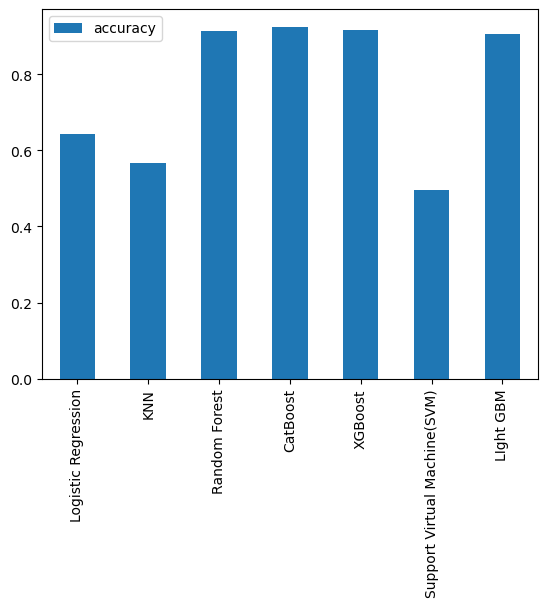

In [31]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model, which are the top 3 highest performing models,

* CatBoost
* XgBoost
* Random Forest

...and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

**Random Forest**

In [32]:
# Initialize lists to store train and test scores
train_scores = []
test_scores = []

# Create a range of values for n_estimators (number of trees in the forest)
n_estimators = range(10, 210, 10)  # From 10 to 200 trees, increasing by 10

# Setup RandomForest instance
rf = RandomForestClassifier(random_state=42)

# Loop through different n_estimators
for i in n_estimators:
    rf.set_params(n_estimators=i)
    
    # Fit the algorithm
    rf.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(rf.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(rf.score(X_test, y_test))



In [33]:
train_scores

[0.9994772608468374,
 0.9994772608468374,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [34]:
test_scores

[0.9102296450939458,
 0.8956158663883089,
 0.9039665970772442,
 0.918580375782881,
 0.9206680584551148,
 0.9123173277661796,
 0.9123173277661796,
 0.9081419624217119,
 0.9123173277661796,
 0.9123173277661796,
 0.9123173277661796,
 0.9123173277661796,
 0.9123173277661796,
 0.9123173277661796,
 0.9123173277661796,
 0.9144050104384134,
 0.9144050104384134,
 0.9164926931106472,
 0.9144050104384134,
 0.9164926931106472]

Maximum Random Forest score on the test data: 92.07%


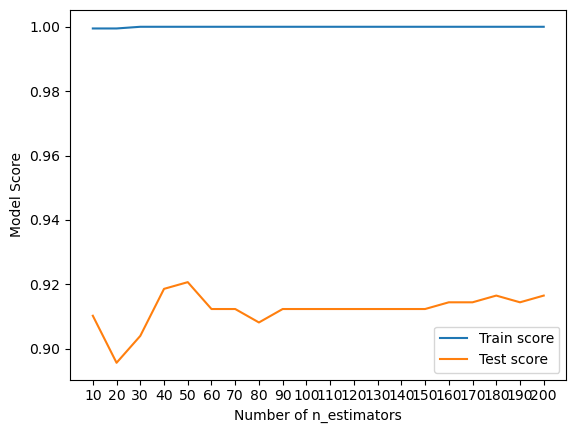

In [35]:
plt.plot(n_estimators, train_scores, label="Train score")
plt.plot(n_estimators, test_scores, label="Test score")
plt.xticks(np.arange(10, 210, 10))
plt.xlabel("Number of n_estimators")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum Random Forest score on the test data: {max(test_scores)*100:.2f}%")

**XGBoost**

In [36]:
from xgboost import XGBClassifier

# Initialize lists to store train and test scores
train_scores = []
test_scores = []

# Create a range of values for n_estimators (number of boosting rounds)
n_estimators = range(10, 210, 10)  # From 10 to 200 rounds, increasing by 10

# Setup XGBoost instance
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Loop through different n_estimators
for i in n_estimators:
    xgb.set_params(n_estimators=i)
    
    # Fit the algorithm
    xgb.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(xgb.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(xgb.score(X_test, y_test))

# At this point, train_scores and test_scores contain the model accuracy for different n_estimators


Maximum XGBoost score on the test data: 91.65%


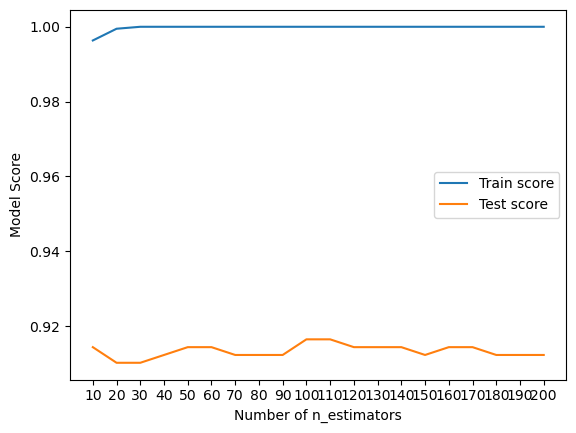

In [37]:
plt.plot(n_estimators, train_scores, label="Train score")
plt.plot(n_estimators, test_scores, label="Test score")
plt.xticks(np.arange(10, 210, 10))
plt.xlabel("Number of n_estimators")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum XGBoost score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

i'm going to be tuning:
* CatBoost
* XgBoost
* Random Forest

... using RandomizedSearchCV

In [38]:
# Create a hyperparameter grid for CatBoostClassifier
catboost_grid = {
    "iterations": np.arange(50, 500, 50),  # Number of boosting iterations
    "depth": np.arange(2, 11, 2),  # Depth of the trees
    "learning_rate": np.logspace(-4, 0, 5),  # Learning rate from 0.0001 to 1
    "l2_leaf_reg": np.arange(1, 10, 2),  # L2 regularization
    "border_count": np.arange(32, 256, 32),  # Number of splits for numeric features
    "bagging_temperature": np.arange(0, 1, 0.2),  # Random strength of bagging
}

In [39]:
# Set the random seed
np.random.seed(42)

# Setup random hyperparameters search for CatBoostClassifier
rs_catboost = RandomizedSearchCV(CatBoostClassifier(silent=True),
                                 param_distributions=catboost_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)

# Fit random hyperparameter search model for CatBoostClassifier
rs_catboost.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001F89057F160>,
                   n_iter=20,
                   param_distributions={'bagging_temperature': array([0. , 0.2, 0.4, 0.6, 0.8]),
                                        'border_count': array([ 32,  64,  96, 128, 160, 192, 224]),
                                        'depth': array([ 2,  4,  6,  8, 10]),
                                        'iterations': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'l2_leaf_reg': array([1, 3, 5, 7, 9]),
                                        'learning_rate': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
                   verbose=True)

In [40]:
# Create a hyperparameter grid for XGBClassifier
xgb_grid = {
    "n_estimators": np.arange(50, 500, 50),  # Number of boosting rounds
    "max_depth": np.arange(3, 11, 2),  # Maximum depth of the trees
    "learning_rate": np.logspace(-4, 0, 5),  # Learning rate from 0.0001 to 1
    "subsample": np.arange(0.5, 1.0, 0.1),  # Subsample ratio of the training instance
    "colsample_bytree": np.arange(0.5, 1.0, 0.1),  # Subsample ratio of columns when constructing each tree
    "gamma": np.logspace(-3, 1, 5),  # Minimum loss reduction required to make a further partition on a leaf node
}


In [41]:
# Set the random seed
np.random.seed(42)

# Setup random hyperparameters search for XGBClassifier
rs_xgboost = RandomizedSearchCV(XGBClassifier(),
                                param_distributions=xgb_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for XGBClassifier
rs_xgboost.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                                        'learning_rate': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                                        'max_depth': array([3, 5, 7, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   verbose=True)

In [42]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(50, 1000, 100),  # Number of trees in the forest
    "max_depth": [None, 10, 20, 30],  # Maximum depth of the tree
    "min_samples_split": np.arange(2, 20, 2),  # Minimum number of samples required to split an internal node
    "min_samples_leaf": np.arange(1, 20, 2),  # Minimum number of samples required to be at a leaf node
    "max_features": ["sqrt", "log2", None],  # Number of features to consider when looking for the best split
    "bootstrap": [True, False],  # Whether bootstrap samples are used when building trees
}


In [43]:
# Set the random seed
np.random.seed(42)

# Setup random hyperparameters search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 150, 250, 350, 450, 550, 650, 750, 850, 950])},
                   verbose=True)

In [48]:
# Check the best parameters for CatBoostClassifier
print(rs_catboost.best_params_)


{'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 100, 'depth': 10, 'border_count': 224, 'bagging_temperature': 0.8}


In [49]:
# Check the best parameters for XGBClassifier
print(rs_xgboost.best_params_)

{'subsample': 0.8999999999999999, 'n_estimators': 350, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [50]:
# Check the best parameters for RandomForestClassifier
print(rs_rf.best_params_)

{'n_estimators': 150, 'min_samples_split': 4, 'min_samples_leaf': 13, 'max_features': None, 'max_depth': 10, 'bootstrap': True}


In [51]:
# Evaluate the randomized search CatBoostClassifier model
rs_catboost.score(X_test, y_test)

0.9269311064718163

In [52]:
# Evaluate the randomized search XGBClassifier model
rs_xgboost.score(X_test, y_test)

0.9123173277661796

In [53]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.9206680584551148

Catboost is the model score closest to 95%, so i'll be moving forward with that.

### Hyperparameter Tuning with GridSearchCV

Since our CatBoostClassifier model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [55]:
# Different hyperparameters for our CatBoostClass
catboost_grid = {'learning_rate': [0.1],
                'l2_leaf_reg': [5],
                'iterations': [100],
                'depth': [10],
                'border_count': [224],
                'bagging_temperature': [0.8]}

# Setup grid hyperparameter search for CatBoostClassifier
gs_catboost = GridSearchCV(CatBoostClassifier(),
                          param_grid= catboost_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_catboost.fit(X_train, y_train);

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 1.3975843	total: 36.4ms	remaining: 3.6s
1:	learn: 1.2371617	total: 39.3ms	remaining: 1.93s
2:	learn: 1.1231622	total: 75.7ms	remaining: 2.45s
3:	learn: 1.0163981	total: 82.4ms	remaining: 1.98s
4:	learn: 0.9345227	total: 157ms	remaining: 2.98s
5:	learn: 0.8549266	total: 178ms	remaining: 2.79s
6:	learn: 0.7867669	total: 259ms	remaining: 3.44s
7:	learn: 0.7267707	total: 340ms	remaining: 3.91s
8:	learn: 0.6777294	total: 418ms	remaining: 4.23s
9:	learn: 0.6242609	total: 509ms	remaining: 4.58s
10:	learn: 0.5916806	total: 588ms	remaining: 4.76s
11:	learn: 0.5522610	total: 658ms	remaining: 4.83s
12:	learn: 0.5187306	total: 749ms	remaining: 5.01s
13:	learn: 0.4855082	total: 839ms	remaining: 5.15s
14:	learn: 0.4554509	total: 845ms	remaining: 4.79s
15:	learn: 0.4341001	total: 924ms	remaining: 4.85s
16:	learn: 0.4155788	total: 1.03s	remaining: 5.04s
17:	learn: 0.3968082	total: 1.11s	remaining: 5.06s
18:	learn: 0.3821008	total: 1.

61:	learn: 0.1624638	total: 4.85s	remaining: 2.97s
62:	learn: 0.1607024	total: 4.93s	remaining: 2.89s
63:	learn: 0.1588008	total: 5s	remaining: 2.81s
64:	learn: 0.1571436	total: 5.09s	remaining: 2.74s
65:	learn: 0.1546879	total: 5.16s	remaining: 2.66s
66:	learn: 0.1530725	total: 5.24s	remaining: 2.58s
67:	learn: 0.1517961	total: 5.31s	remaining: 2.5s
68:	learn: 0.1492663	total: 5.39s	remaining: 2.42s
69:	learn: 0.1477819	total: 5.47s	remaining: 2.34s
70:	learn: 0.1458041	total: 5.55s	remaining: 2.27s
71:	learn: 0.1443548	total: 5.63s	remaining: 2.19s
72:	learn: 0.1425396	total: 5.71s	remaining: 2.11s
73:	learn: 0.1407254	total: 5.8s	remaining: 2.04s
74:	learn: 0.1384264	total: 5.88s	remaining: 1.96s
75:	learn: 0.1365949	total: 5.96s	remaining: 1.88s
76:	learn: 0.1352000	total: 6.04s	remaining: 1.8s
77:	learn: 0.1339492	total: 6.12s	remaining: 1.73s
78:	learn: 0.1325856	total: 6.2s	remaining: 1.65s
79:	learn: 0.1316079	total: 6.29s	remaining: 1.57s
80:	learn: 0.1302294	total: 6.39s	rema

23:	learn: 0.3215921	total: 1.78s	remaining: 5.63s
24:	learn: 0.3105587	total: 1.85s	remaining: 5.55s
25:	learn: 0.3010286	total: 1.92s	remaining: 5.47s
26:	learn: 0.2927228	total: 2s	remaining: 5.4s
27:	learn: 0.2890041	total: 2.07s	remaining: 5.33s
28:	learn: 0.2782957	total: 2.15s	remaining: 5.26s
29:	learn: 0.2659818	total: 2.23s	remaining: 5.2s
30:	learn: 0.2602025	total: 2.3s	remaining: 5.13s
31:	learn: 0.2549792	total: 2.38s	remaining: 5.05s
32:	learn: 0.2486865	total: 2.46s	remaining: 5s
33:	learn: 0.2434824	total: 2.54s	remaining: 4.93s
34:	learn: 0.2384707	total: 2.62s	remaining: 4.86s
35:	learn: 0.2315373	total: 2.7s	remaining: 4.8s
36:	learn: 0.2272753	total: 2.77s	remaining: 4.72s
37:	learn: 0.2227158	total: 2.85s	remaining: 4.64s
38:	learn: 0.2175548	total: 2.92s	remaining: 4.57s
39:	learn: 0.2135710	total: 3s	remaining: 4.5s
40:	learn: 0.2101513	total: 3.07s	remaining: 4.42s
41:	learn: 0.2075724	total: 3.15s	remaining: 4.35s
42:	learn: 0.2045805	total: 3.23s	remaining: 4

85:	learn: 0.1230280	total: 6.74s	remaining: 1.1s
86:	learn: 0.1221316	total: 6.82s	remaining: 1.02s
87:	learn: 0.1212183	total: 6.9s	remaining: 941ms
88:	learn: 0.1202319	total: 6.98s	remaining: 862ms
89:	learn: 0.1190015	total: 7.06s	remaining: 784ms
90:	learn: 0.1177028	total: 7.13s	remaining: 705ms
91:	learn: 0.1163147	total: 7.22s	remaining: 628ms
92:	learn: 0.1154013	total: 7.31s	remaining: 550ms
93:	learn: 0.1141736	total: 7.39s	remaining: 472ms
94:	learn: 0.1131518	total: 7.47s	remaining: 393ms
95:	learn: 0.1122513	total: 7.54s	remaining: 314ms
96:	learn: 0.1114660	total: 7.63s	remaining: 236ms
97:	learn: 0.1106652	total: 7.72s	remaining: 158ms
98:	learn: 0.1099330	total: 7.81s	remaining: 78.8ms
99:	learn: 0.1088405	total: 7.88s	remaining: 0us
0:	learn: 1.3850760	total: 49.5ms	remaining: 4.9s
1:	learn: 1.2453684	total: 130ms	remaining: 6.36s
2:	learn: 1.1083541	total: 171ms	remaining: 5.53s
3:	learn: 0.9968831	total: 255ms	remaining: 6.12s
4:	learn: 0.9028897	total: 281ms	remai

In [56]:
# Check the hyperparameters
gs_catboost.best_params_

{'bagging_temperature': 0.8,
 'border_count': 224,
 'depth': 10,
 'iterations': 100,
 'l2_leaf_reg': 5,
 'learning_rate': 0.1}

In [57]:
# Evaluate the grid search CatBoostClassifier model
gs_catboost.score(X_test, y_test)

0.9269311064718163

### Evaluating our tuned machine learning classifier, beyond accuracy


* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparison and evaluate our trained model, first we need to make prediction.

In [58]:
# Make predictions with tuned model
y_preds = gs_catboost.predict(X_test)

In [59]:
y_preds

array([[4.],
       [1.],
       [3.],
       [0.],
       [4.],
       [2.],
       [3.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [2.],
       [4.],
       [2.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [1.],
       [4.],
       [4.],
       [4.],
       [1.],
       [3.],
       [3.],
       [3.],
       [4.],
       [2.],
       [1.],
       [4.],
       [4.],
       [1.],
       [3.],
       [1.],
       [4.],
       [2.],
       [0.],
       [4.],
       [3.],
       [4.],
       [3.],
       [2.],
       [4.],
       [0.],
       [4.],
       [1.],
       [1.],
       [4.],
       [4.],
       [1.],
       [1.],
       [3.],
       [1.],
       [4.],
       [3.],
       [4.],
       [3.],
       [3.],
       [4.],
       [4.],
       [4.],
       [3.],
       [3.],
       [4.],
       [1.],
       [0.],
       [4.],
       [2.],
       [2.],
       [4.],
       [2.],
       [3.],

In [60]:
y_test

1004    4.0
196     1.0
2342    2.0
1708    0.0
435     4.0
       ... 
986     4.0
120     3.0
283     3.0
1740    2.0
1726    4.0
Name: GradeClass, Length: 479, dtype: float64

Macro-averaged AUC Score: 0.9921076892356888


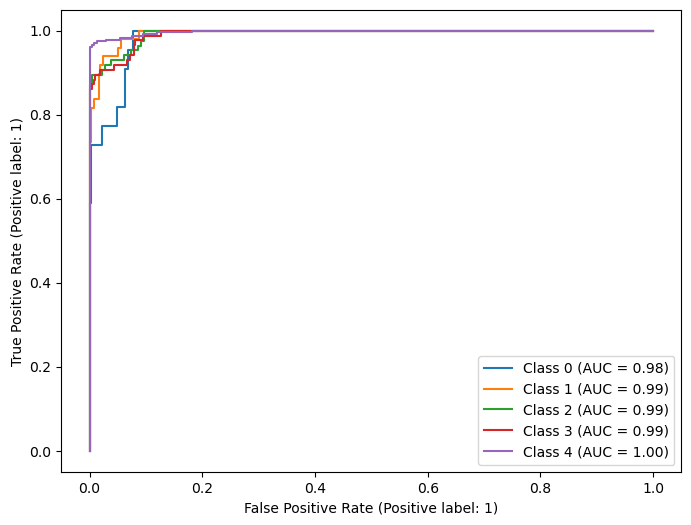

In [64]:
# Plot ROC curve and calculate AUC metric

from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  # Assuming 5 classes (0 to 4)

# Get probabilities for each class
y_pred_probs = gs_catboost.predict_proba(X_test)

# Calculate AUC for each class using One-vs-Rest approach
auc_score = roc_auc_score(y_test_bin, y_pred_probs, average="macro", multi_class="ovr")
print(f"Macro-averaged AUC Score: {auc_score}")

# Plot ROC curve for each class
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(5):  # 5 classes
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_pred_probs[:, i], name=f"Class {i}", ax=ax)

plt.show()

In [65]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 14   2   1   4   1]
 [  0  45   0   1   3]
 [  1   4  76   2   2]
 [  0   6   0  76   4]
 [  0   2   1   1 233]]


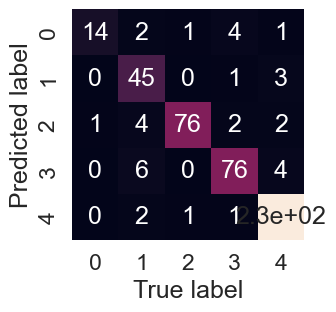

In [66]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)
    

Now we've got a ROC curve, an AUC metric and confusion matrix, let's get a classification report as well as cross-validated precision, recall, and f1-score.

In [67]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.93      0.64      0.76        22
         1.0       0.76      0.92      0.83        49
         2.0       0.97      0.89      0.93        85
         3.0       0.90      0.88      0.89        86
         4.0       0.96      0.98      0.97       237

    accuracy                           0.93       479
   macro avg       0.91      0.86      0.88       479
weighted avg       0.93      0.93      0.93       479



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall, and f1-score of our model using cross-validation and do so we'll be using 
`cross_val_score()`.

In [68]:
# Check best hyperparameter
gs_catboost.best_params_

{'bagging_temperature': 0.8,
 'border_count': 224,
 'depth': 10,
 'iterations': 100,
 'l2_leaf_reg': 5,
 'learning_rate': 0.1}

In [72]:
# Create a new classifier
clf = CatBoostClassifier(bagging_temperature =0.8,
                         border_count= 224,
                         depth= 10,
                         iterations= 100,
                         l2_leaf_reg= 5,
                         learning_rate= 0.1)

In [73]:
# Cross_validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

0:	learn: 1.3880264	total: 66.5ms	remaining: 6.59s
1:	learn: 1.2479139	total: 170ms	remaining: 8.33s
2:	learn: 1.1183230	total: 220ms	remaining: 7.12s
3:	learn: 1.0192409	total: 338ms	remaining: 8.12s
4:	learn: 0.9269864	total: 365ms	remaining: 6.93s
5:	learn: 0.8456006	total: 460ms	remaining: 7.2s
6:	learn: 0.7749999	total: 565ms	remaining: 7.51s
7:	learn: 0.7177433	total: 664ms	remaining: 7.63s
8:	learn: 0.6667453	total: 758ms	remaining: 7.66s
9:	learn: 0.6286218	total: 865ms	remaining: 7.79s
10:	learn: 0.5879635	total: 965ms	remaining: 7.81s
11:	learn: 0.5522931	total: 1.07s	remaining: 7.85s
12:	learn: 0.5244235	total: 1.17s	remaining: 7.85s
13:	learn: 0.4965274	total: 1.18s	remaining: 7.26s
14:	learn: 0.4746709	total: 1.28s	remaining: 7.24s
15:	learn: 0.4574946	total: 1.37s	remaining: 7.2s
16:	learn: 0.4401662	total: 1.48s	remaining: 7.22s
17:	learn: 0.4234885	total: 1.57s	remaining: 7.16s
18:	learn: 0.4057998	total: 1.66s	remaining: 7.08s
19:	learn: 0.3908130	total: 1.76s	remainin

63:	learn: 0.1841735	total: 6.56s	remaining: 3.69s
64:	learn: 0.1816243	total: 6.67s	remaining: 3.59s
65:	learn: 0.1795440	total: 6.76s	remaining: 3.48s
66:	learn: 0.1777937	total: 6.87s	remaining: 3.38s
67:	learn: 0.1760106	total: 6.96s	remaining: 3.28s
68:	learn: 0.1743848	total: 7.07s	remaining: 3.18s
69:	learn: 0.1727593	total: 7.17s	remaining: 3.07s
70:	learn: 0.1702436	total: 7.26s	remaining: 2.97s
71:	learn: 0.1677964	total: 7.37s	remaining: 2.87s
72:	learn: 0.1658377	total: 7.5s	remaining: 2.77s
73:	learn: 0.1644629	total: 7.6s	remaining: 2.67s
74:	learn: 0.1629528	total: 7.7s	remaining: 2.56s
75:	learn: 0.1613043	total: 7.81s	remaining: 2.47s
76:	learn: 0.1594165	total: 7.98s	remaining: 2.38s
77:	learn: 0.1580277	total: 8.08s	remaining: 2.28s
78:	learn: 0.1562597	total: 8.2s	remaining: 2.18s
79:	learn: 0.1550018	total: 8.31s	remaining: 2.08s
80:	learn: 0.1521484	total: 8.42s	remaining: 1.98s
81:	learn: 0.1505919	total: 8.53s	remaining: 1.87s
82:	learn: 0.1494790	total: 8.63s	r

26:	learn: 0.2934928	total: 2.57s	remaining: 6.94s
27:	learn: 0.2875882	total: 2.67s	remaining: 6.87s
28:	learn: 0.2804121	total: 2.78s	remaining: 6.82s
29:	learn: 0.2731054	total: 2.9s	remaining: 6.76s
30:	learn: 0.2692594	total: 3.02s	remaining: 6.72s
31:	learn: 0.2623991	total: 3.13s	remaining: 6.65s
32:	learn: 0.2570713	total: 3.23s	remaining: 6.56s
33:	learn: 0.2519232	total: 3.34s	remaining: 6.48s
34:	learn: 0.2489091	total: 3.45s	remaining: 6.4s
35:	learn: 0.2417675	total: 3.57s	remaining: 6.34s
36:	learn: 0.2371182	total: 3.75s	remaining: 6.39s
37:	learn: 0.2332579	total: 3.88s	remaining: 6.33s
38:	learn: 0.2303250	total: 3.98s	remaining: 6.23s
39:	learn: 0.2282312	total: 4.09s	remaining: 6.14s
40:	learn: 0.2246951	total: 4.21s	remaining: 6.06s
41:	learn: 0.2212795	total: 4.32s	remaining: 5.96s
42:	learn: 0.2181000	total: 4.41s	remaining: 5.85s
43:	learn: 0.2136797	total: 4.51s	remaining: 5.74s
44:	learn: 0.2112339	total: 4.61s	remaining: 5.63s
45:	learn: 0.2077970	total: 4.7s	

89:	learn: 0.0243915	total: 8.5s	remaining: 944ms
90:	learn: 0.0238313	total: 8.61s	remaining: 852ms
91:	learn: 0.0231868	total: 8.71s	remaining: 758ms
92:	learn: 0.0223009	total: 8.82s	remaining: 664ms
93:	learn: 0.0216505	total: 8.93s	remaining: 570ms
94:	learn: 0.0210642	total: 9.04s	remaining: 476ms
95:	learn: 0.0209064	total: 9.14s	remaining: 381ms
96:	learn: 0.0208005	total: 9.25s	remaining: 286ms
97:	learn: 0.0207037	total: 9.35s	remaining: 191ms
98:	learn: 0.0204308	total: 9.46s	remaining: 95.5ms
99:	learn: 0.0201493	total: 9.55s	remaining: 0us


array([0.99373695, 0.99791232, 0.9874477 , 0.96025105, 0.64435146])

In [74]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9167398957032171

In [83]:
# Cross_validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision_macro")# Since your target variable (y) is multiclass
cv_precision


0:	learn: 1.3880264	total: 111ms	remaining: 11s
1:	learn: 1.2479139	total: 236ms	remaining: 11.6s
2:	learn: 1.1183230	total: 283ms	remaining: 9.15s
3:	learn: 1.0192409	total: 394ms	remaining: 9.46s
4:	learn: 0.9269864	total: 421ms	remaining: 7.99s
5:	learn: 0.8456006	total: 516ms	remaining: 8.09s
6:	learn: 0.7749999	total: 612ms	remaining: 8.13s
7:	learn: 0.7177433	total: 718ms	remaining: 8.26s
8:	learn: 0.6667453	total: 835ms	remaining: 8.45s
9:	learn: 0.6286218	total: 949ms	remaining: 8.54s
10:	learn: 0.5879635	total: 1.05s	remaining: 8.48s
11:	learn: 0.5522931	total: 1.15s	remaining: 8.45s
12:	learn: 0.5244235	total: 1.24s	remaining: 8.29s
13:	learn: 0.4965274	total: 1.25s	remaining: 7.65s
14:	learn: 0.4746709	total: 1.35s	remaining: 7.65s
15:	learn: 0.4574946	total: 1.44s	remaining: 7.54s
16:	learn: 0.4401662	total: 1.53s	remaining: 7.46s
17:	learn: 0.4234885	total: 1.69s	remaining: 7.72s
18:	learn: 0.4057998	total: 1.8s	remaining: 7.68s
19:	learn: 0.3908130	total: 1.9s	remaining: 

63:	learn: 0.1841735	total: 7.92s	remaining: 4.45s
64:	learn: 0.1816243	total: 8.03s	remaining: 4.32s
65:	learn: 0.1795440	total: 8.13s	remaining: 4.19s
66:	learn: 0.1777937	total: 8.24s	remaining: 4.06s
67:	learn: 0.1760106	total: 8.34s	remaining: 3.92s
68:	learn: 0.1743848	total: 8.45s	remaining: 3.79s
69:	learn: 0.1727593	total: 8.54s	remaining: 3.66s
70:	learn: 0.1702436	total: 8.64s	remaining: 3.53s
71:	learn: 0.1677964	total: 8.73s	remaining: 3.4s
72:	learn: 0.1658377	total: 8.84s	remaining: 3.27s
73:	learn: 0.1644629	total: 8.95s	remaining: 3.14s
74:	learn: 0.1629528	total: 9.05s	remaining: 3.02s
75:	learn: 0.1613043	total: 9.14s	remaining: 2.89s
76:	learn: 0.1594165	total: 9.24s	remaining: 2.76s
77:	learn: 0.1580277	total: 9.34s	remaining: 2.63s
78:	learn: 0.1562597	total: 9.43s	remaining: 2.51s
79:	learn: 0.1550018	total: 9.53s	remaining: 2.38s
80:	learn: 0.1521484	total: 9.62s	remaining: 2.25s
81:	learn: 0.1505919	total: 9.71s	remaining: 2.13s
82:	learn: 0.1494790	total: 9.81

26:	learn: 0.2934928	total: 2.5s	remaining: 6.77s
27:	learn: 0.2875882	total: 2.66s	remaining: 6.84s
28:	learn: 0.2804121	total: 2.78s	remaining: 6.81s
29:	learn: 0.2731054	total: 2.87s	remaining: 6.7s
30:	learn: 0.2692594	total: 2.96s	remaining: 6.59s
31:	learn: 0.2623991	total: 3.13s	remaining: 6.65s
32:	learn: 0.2570713	total: 3.33s	remaining: 6.76s
33:	learn: 0.2519232	total: 3.56s	remaining: 6.91s
34:	learn: 0.2489091	total: 3.76s	remaining: 6.98s
35:	learn: 0.2417675	total: 3.92s	remaining: 6.96s
36:	learn: 0.2371182	total: 4.01s	remaining: 6.84s
37:	learn: 0.2332579	total: 4.11s	remaining: 6.71s
38:	learn: 0.2303250	total: 4.25s	remaining: 6.65s
39:	learn: 0.2282312	total: 4.45s	remaining: 6.67s
40:	learn: 0.2246951	total: 4.69s	remaining: 6.75s
41:	learn: 0.2212795	total: 4.89s	remaining: 6.75s
42:	learn: 0.2181000	total: 5.03s	remaining: 6.67s
43:	learn: 0.2136797	total: 5.13s	remaining: 6.53s
44:	learn: 0.2112339	total: 5.23s	remaining: 6.39s
45:	learn: 0.2077970	total: 5.33s

88:	learn: 0.0246372	total: 8.09s	remaining: 1000ms
89:	learn: 0.0243915	total: 8.2s	remaining: 911ms
90:	learn: 0.0238313	total: 8.31s	remaining: 822ms
91:	learn: 0.0231868	total: 8.42s	remaining: 732ms
92:	learn: 0.0223009	total: 8.52s	remaining: 641ms
93:	learn: 0.0216505	total: 8.62s	remaining: 550ms
94:	learn: 0.0210642	total: 8.72s	remaining: 459ms
95:	learn: 0.0209064	total: 8.82s	remaining: 367ms
96:	learn: 0.0208005	total: 8.91s	remaining: 275ms
97:	learn: 0.0207037	total: 9s	remaining: 184ms
98:	learn: 0.0204308	total: 9.1s	remaining: 91.9ms
99:	learn: 0.0201493	total: 9.21s	remaining: 0us


array([0.99006095, 0.99746835, 0.97605096, 0.93186849, 0.67545425])

In [84]:
cv_precision = np.mean(cv_precision)
cv_precision

0.9141805984634501

In [85]:
# Cross_validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall_macro") #Since your target variable (y) is multiclass
cv_recall

0:	learn: 1.3880264	total: 123ms	remaining: 12.2s
1:	learn: 1.2479139	total: 250ms	remaining: 12.3s
2:	learn: 1.1183230	total: 298ms	remaining: 9.64s
3:	learn: 1.0192409	total: 417ms	remaining: 10s
4:	learn: 0.9269864	total: 443ms	remaining: 8.42s
5:	learn: 0.8456006	total: 540ms	remaining: 8.45s
6:	learn: 0.7749999	total: 658ms	remaining: 8.74s
7:	learn: 0.7177433	total: 773ms	remaining: 8.89s
8:	learn: 0.6667453	total: 878ms	remaining: 8.88s
9:	learn: 0.6286218	total: 989ms	remaining: 8.9s
10:	learn: 0.5879635	total: 1.08s	remaining: 8.73s
11:	learn: 0.5522931	total: 1.18s	remaining: 8.68s
12:	learn: 0.5244235	total: 1.28s	remaining: 8.54s
13:	learn: 0.4965274	total: 1.28s	remaining: 7.89s
14:	learn: 0.4746709	total: 1.37s	remaining: 7.79s
15:	learn: 0.4574946	total: 1.48s	remaining: 7.78s
16:	learn: 0.4401662	total: 1.57s	remaining: 7.67s
17:	learn: 0.4234885	total: 1.66s	remaining: 7.56s
18:	learn: 0.4057998	total: 1.77s	remaining: 7.54s
19:	learn: 0.3908130	total: 1.86s	remaining:

62:	learn: 0.1859292	total: 7.45s	remaining: 4.38s
63:	learn: 0.1841735	total: 7.55s	remaining: 4.25s
64:	learn: 0.1816243	total: 7.67s	remaining: 4.13s
65:	learn: 0.1795440	total: 7.78s	remaining: 4.01s
66:	learn: 0.1777937	total: 7.91s	remaining: 3.89s
67:	learn: 0.1760106	total: 8.01s	remaining: 3.77s
68:	learn: 0.1743848	total: 8.1s	remaining: 3.64s
69:	learn: 0.1727593	total: 8.22s	remaining: 3.52s
70:	learn: 0.1702436	total: 8.32s	remaining: 3.4s
71:	learn: 0.1677964	total: 8.41s	remaining: 3.27s
72:	learn: 0.1658377	total: 8.52s	remaining: 3.15s
73:	learn: 0.1644629	total: 8.62s	remaining: 3.03s
74:	learn: 0.1629528	total: 8.72s	remaining: 2.91s
75:	learn: 0.1613043	total: 8.83s	remaining: 2.79s
76:	learn: 0.1594165	total: 8.92s	remaining: 2.67s
77:	learn: 0.1580277	total: 9.02s	remaining: 2.54s
78:	learn: 0.1562597	total: 9.16s	remaining: 2.44s
79:	learn: 0.1550018	total: 9.27s	remaining: 2.32s
80:	learn: 0.1521484	total: 9.36s	remaining: 2.19s
81:	learn: 0.1505919	total: 9.46s

26:	learn: 0.2934928	total: 2.57s	remaining: 6.94s
27:	learn: 0.2875882	total: 2.65s	remaining: 6.82s
28:	learn: 0.2804121	total: 2.74s	remaining: 6.72s
29:	learn: 0.2731054	total: 2.85s	remaining: 6.66s
30:	learn: 0.2692594	total: 3s	remaining: 6.67s
31:	learn: 0.2623991	total: 3.11s	remaining: 6.61s
32:	learn: 0.2570713	total: 3.23s	remaining: 6.56s
33:	learn: 0.2519232	total: 3.34s	remaining: 6.49s
34:	learn: 0.2489091	total: 3.44s	remaining: 6.4s
35:	learn: 0.2417675	total: 3.58s	remaining: 6.36s
36:	learn: 0.2371182	total: 3.71s	remaining: 6.32s
37:	learn: 0.2332579	total: 3.85s	remaining: 6.28s
38:	learn: 0.2303250	total: 3.99s	remaining: 6.24s
39:	learn: 0.2282312	total: 4.11s	remaining: 6.17s
40:	learn: 0.2246951	total: 4.24s	remaining: 6.1s
41:	learn: 0.2212795	total: 4.37s	remaining: 6.03s
42:	learn: 0.2181000	total: 4.5s	remaining: 5.96s
43:	learn: 0.2136797	total: 4.63s	remaining: 5.89s
44:	learn: 0.2112339	total: 4.76s	remaining: 5.82s
45:	learn: 0.2077970	total: 4.91s	rem

90:	learn: 0.0238313	total: 8s	remaining: 791ms
91:	learn: 0.0231868	total: 8.08s	remaining: 703ms
92:	learn: 0.0223009	total: 8.18s	remaining: 616ms
93:	learn: 0.0216505	total: 8.27s	remaining: 528ms
94:	learn: 0.0210642	total: 8.36s	remaining: 440ms
95:	learn: 0.0209064	total: 8.46s	remaining: 352ms
96:	learn: 0.0208005	total: 8.55s	remaining: 264ms
97:	learn: 0.0207037	total: 8.64s	remaining: 176ms
98:	learn: 0.0204308	total: 8.79s	remaining: 88.7ms
99:	learn: 0.0201493	total: 8.9s	remaining: 0us


array([0.98460386, 0.9962963 , 0.98363025, 0.84779343, 0.57167358])

In [86]:
cv_recall = np.mean(cv_recall)
cv_recall

0.8767994832907744

In [87]:
# Cross_validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1_macro")#  Since your target variable (y) is multiclass
cv_f1

0:	learn: 1.3880264	total: 207ms	remaining: 20.4s
1:	learn: 1.2479139	total: 313ms	remaining: 15.3s
2:	learn: 1.1183230	total: 379ms	remaining: 12.3s
3:	learn: 1.0192409	total: 573ms	remaining: 13.8s
4:	learn: 0.9269864	total: 603ms	remaining: 11.4s
5:	learn: 0.8456006	total: 698ms	remaining: 10.9s
6:	learn: 0.7749999	total: 793ms	remaining: 10.5s
7:	learn: 0.7177433	total: 915ms	remaining: 10.5s
8:	learn: 0.6667453	total: 1.02s	remaining: 10.3s
9:	learn: 0.6286218	total: 1.14s	remaining: 10.3s
10:	learn: 0.5879635	total: 1.25s	remaining: 10.1s
11:	learn: 0.5522931	total: 1.36s	remaining: 9.97s
12:	learn: 0.5244235	total: 1.45s	remaining: 9.72s
13:	learn: 0.4965274	total: 1.46s	remaining: 8.98s
14:	learn: 0.4746709	total: 1.57s	remaining: 8.89s
15:	learn: 0.4574946	total: 1.67s	remaining: 8.75s
16:	learn: 0.4401662	total: 1.77s	remaining: 8.67s
17:	learn: 0.4234885	total: 1.93s	remaining: 8.79s
18:	learn: 0.4057998	total: 2.16s	remaining: 9.22s
19:	learn: 0.3908130	total: 2.36s	remaini

62:	learn: 0.1859292	total: 5.76s	remaining: 3.38s
63:	learn: 0.1841735	total: 5.86s	remaining: 3.29s
64:	learn: 0.1816243	total: 5.95s	remaining: 3.2s
65:	learn: 0.1795440	total: 6.05s	remaining: 3.11s
66:	learn: 0.1777937	total: 6.13s	remaining: 3.02s
67:	learn: 0.1760106	total: 6.22s	remaining: 2.93s
68:	learn: 0.1743848	total: 6.31s	remaining: 2.84s
69:	learn: 0.1727593	total: 6.41s	remaining: 2.75s
70:	learn: 0.1702436	total: 6.5s	remaining: 2.65s
71:	learn: 0.1677964	total: 6.58s	remaining: 2.56s
72:	learn: 0.1658377	total: 6.67s	remaining: 2.47s
73:	learn: 0.1644629	total: 6.75s	remaining: 2.37s
74:	learn: 0.1629528	total: 6.93s	remaining: 2.31s
75:	learn: 0.1613043	total: 7.03s	remaining: 2.22s
76:	learn: 0.1594165	total: 7.14s	remaining: 2.13s
77:	learn: 0.1580277	total: 7.23s	remaining: 2.04s
78:	learn: 0.1562597	total: 7.32s	remaining: 1.95s
79:	learn: 0.1550018	total: 7.42s	remaining: 1.85s
80:	learn: 0.1521484	total: 7.57s	remaining: 1.77s
81:	learn: 0.1505919	total: 7.74s

25:	learn: 0.3024945	total: 2.89s	remaining: 8.22s
26:	learn: 0.2934928	total: 3.04s	remaining: 8.23s
27:	learn: 0.2875882	total: 3.19s	remaining: 8.21s
28:	learn: 0.2804121	total: 3.33s	remaining: 8.15s
29:	learn: 0.2731054	total: 3.46s	remaining: 8.08s
30:	learn: 0.2692594	total: 3.58s	remaining: 7.97s
31:	learn: 0.2623991	total: 3.7s	remaining: 7.87s
32:	learn: 0.2570713	total: 3.81s	remaining: 7.73s
33:	learn: 0.2519232	total: 3.9s	remaining: 7.58s
34:	learn: 0.2489091	total: 4.01s	remaining: 7.44s
35:	learn: 0.2417675	total: 4.13s	remaining: 7.34s
36:	learn: 0.2371182	total: 4.29s	remaining: 7.3s
37:	learn: 0.2332579	total: 4.44s	remaining: 7.25s
38:	learn: 0.2303250	total: 4.57s	remaining: 7.15s
39:	learn: 0.2282312	total: 4.69s	remaining: 7.04s
40:	learn: 0.2246951	total: 4.8s	remaining: 6.91s
41:	learn: 0.2212795	total: 4.92s	remaining: 6.79s
42:	learn: 0.2181000	total: 5.03s	remaining: 6.66s
43:	learn: 0.2136797	total: 5.14s	remaining: 6.54s
44:	learn: 0.2112339	total: 5.25s	r

88:	learn: 0.0246372	total: 9.14s	remaining: 1.13s
89:	learn: 0.0243915	total: 9.24s	remaining: 1.03s
90:	learn: 0.0238313	total: 9.33s	remaining: 923ms
91:	learn: 0.0231868	total: 9.43s	remaining: 820ms
92:	learn: 0.0223009	total: 9.52s	remaining: 717ms
93:	learn: 0.0216505	total: 9.61s	remaining: 613ms
94:	learn: 0.0210642	total: 9.76s	remaining: 514ms
95:	learn: 0.0209064	total: 9.86s	remaining: 411ms
96:	learn: 0.0208005	total: 9.96s	remaining: 308ms
97:	learn: 0.0207037	total: 10.1s	remaining: 205ms
98:	learn: 0.0204308	total: 10.2s	remaining: 103ms
99:	learn: 0.0201493	total: 10.2s	remaining: 0us


array([0.98720972, 0.99685696, 0.97945218, 0.86089222, 0.5339708 ])

In [88]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.871676373814387

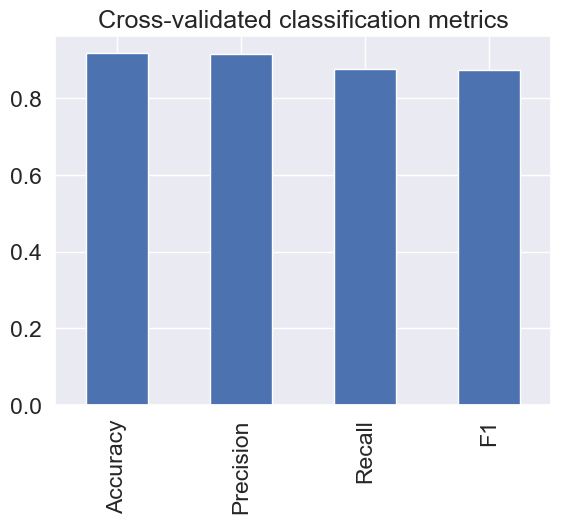

In [89]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0]) 

cv_metrics.T.plot.bar(title = "Cross-validated classification metrics",
                     legend=False);

### Feature Importance

Feature importance is another way of asking, "which feature contributed most to the outcome of the model and how did they contribute ?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our CatBoostClassifier model...

In [90]:
# Fit an instance of CatBoostClassifier
clf = CatBoostClassifier(bagging_temperature =0.8,
                         border_count= 224,
                         depth= 10,
                         iterations= 100,
                         l2_leaf_reg= 5,
                         learning_rate= 0.1)

clf.fit(X_train, y_train);

0:	learn: 1.3850760	total: 86.3ms	remaining: 8.54s
1:	learn: 1.2453684	total: 198ms	remaining: 9.7s
2:	learn: 1.1083541	total: 246ms	remaining: 7.96s
3:	learn: 0.9968831	total: 361ms	remaining: 8.67s
4:	learn: 0.9028897	total: 387ms	remaining: 7.35s
5:	learn: 0.8140011	total: 475ms	remaining: 7.44s
6:	learn: 0.7394035	total: 571ms	remaining: 7.58s
7:	learn: 0.6768784	total: 676ms	remaining: 7.77s
8:	learn: 0.6275555	total: 770ms	remaining: 7.79s
9:	learn: 0.5882892	total: 795ms	remaining: 7.15s
10:	learn: 0.5504308	total: 891ms	remaining: 7.21s
11:	learn: 0.5235007	total: 1.02s	remaining: 7.46s
12:	learn: 0.4969770	total: 1.12s	remaining: 7.48s
13:	learn: 0.4715566	total: 1.22s	remaining: 7.5s
14:	learn: 0.4435328	total: 1.32s	remaining: 7.49s
15:	learn: 0.4250814	total: 1.42s	remaining: 7.48s
16:	learn: 0.4066146	total: 1.52s	remaining: 7.41s
17:	learn: 0.3893771	total: 1.61s	remaining: 7.35s
18:	learn: 0.3751148	total: 1.72s	remaining: 7.33s
19:	learn: 0.3566999	total: 1.81s	remainin

In [92]:
# Check feature importance
clf.get_feature_importance()


array([12.53113734,  1.40732651,  0.51670976,  1.56741081,  1.27007058,
        2.01158876,  2.72501116,  0.47590392,  1.96235966,  0.41485563,
        0.31972682,  0.15271472,  0.28696073, 74.35822362])

In [94]:
# Get feature importance from CatBoostClassifier
feature_importance = clf.get_feature_importance()

# Match feature importance to feature names
feature_dict = dict(zip(df.columns, feature_importance))

# Display the feature importance dictionary
feature_dict


{'StudentID': 12.531137344079918,
 'Age': 1.407326506097532,
 'Gender': 0.5167097619103229,
 'Ethnicity': 1.5674108066088261,
 'ParentalEducation': 1.2700705776208625,
 'StudyTimeWeekly': 2.0115887589659516,
 'Absences': 2.725011157056739,
 'Tutoring': 0.47590392360606004,
 'ParentalSupport': 1.9623596553275975,
 'Extracurricular': 0.4148556278347819,
 'Sports': 0.3197268200092489,
 'Music': 0.15271471536692402,
 'Volunteering': 0.28696072867466976,
 'GPA': 74.35822361684055}

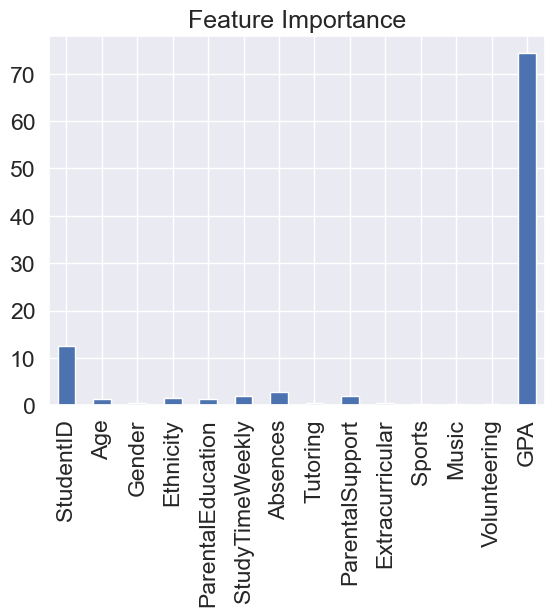

In [95]:
 # Visualize feture importance
feature_df = pd.DataFrame(feature_dict, index =[0])
feature_df.T.plot.bar(title="Feature Importance", legend= False);

In [98]:
from joblib import dump, load

# Save model to file
dump(clf, filename="gs_catboost_model_1.joblib")

['gs_catboost_model_1.joblib']

## Summary

Based on our goal:

`If we can reach 95% accuracy at predicting the Grade Class of a student based on their performance in academic activities during the proof of concept, we'll pursue the project.`

We didn't reach our goal of `95%` but we got an accuracy of `92.60%` 

To improve the model;
* Could you collect more data?
* Could you try a better model?
* Could you improve the current models? (beyond what we've done so far)

